In [0]:
import pandas as pd

In [0]:
df = spark.read.table("default.claude_kroger_csd") #importing dataset

df = df.toPandas()

In [0]:
df.head()

Dates  Start of Week  ... Tactic_End_Date     Spend
0  2022-01-01  12/26/21 0:00  ...      2022-02-28  $635.59 
1  2022-01-01  12/26/21 0:00  ...      2022-02-28  $912.97 
2  2022-01-01  12/26/21 0:00  ...      2022-02-28  $723.71 
3  2022-01-01  12/26/21 0:00  ...      2022-02-28  $635.59 
4  2022-01-01  12/26/21 0:00  ...      2022-02-28  $912.97 

[5 rows x 13 columns]

In [0]:
df.describe()

Fiscal_Year
count  10146.000000
mean    2022.640252
std        0.534370
min     2022.000000
25%     2022.000000
50%     2023.000000
75%     2023.000000
max     2024.000000

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10146 entries, 0 to 10145
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dates              10146 non-null  object
 1   Start of Week      10146 non-null  object
 2   Week of Year       10146 non-null  object
 3   Fiscal_Year        10146 non-null  int64 
 4   Platform           9556 non-null   object
 5   Retailer           10146 non-null  object
 6   Program            10146 non-null  object
 7   Brand              10146 non-null  object
 8   Tactic_Group       10146 non-null  object
 9   Tactic             10146 non-null  object
 10  Tactic_Start_Date  10146 non-null  object
 11  Tactic_End_Date    10146 non-null  object
 12  Spend              10146 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.0+ MB


In [0]:
df.isnull().sum()

Dates                  0
Start of Week          0
Week of Year           0
Fiscal_Year            0
Platform             590
Retailer               0
Program                0
Brand                  0
Tactic_Group           0
Tactic                 0
Tactic_Start_Date      0
Tactic_End_Date        0
Spend                  0
dtype: int64

In [0]:
df.columns


Index(['Dates', 'Start of Week', 'Week of Year', 'Fiscal_Year', 'Platform',
       'Retailer', 'Program', 'Brand', 'Tactic_Group', 'Tactic',
       'Tactic_Start_Date', 'Tactic_End_Date', 'Spend'],
      dtype='object')

In [0]:
#Convert 'Dates' to datetime objects
df['Dates'] = pd.to_datetime(df['Dates'])
df.rename(columns={'Dates': 'Date'}, inplace=True)


In [0]:
df['Date']

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
10141   2024-03-24
10142   2024-03-25
10143   2024-03-26
10144   2024-03-27
10145   2024-03-28
Name: Date, Length: 10146, dtype: datetime64[ns]

In [0]:
    df['Platform'].unique()

array(['Flavors Zero 2.0', 'McCafe Playtime', None,
       'Portfolio - Spring Seasonals (GMCR, TODS, MCCafe)',
       'GMCR Brew Over Ice', 'Custom Program', 'Coke - Simple Coke',
       'Omni - Summer Water Hydration', 'Snapple Zero Sugar',
       'Sunkist Flavor Expansion', 'Dr Pepper Jurassic World',
       "Mott's Back To School", 'Dr Pepper Football Wave 1',
       'Portfolio - Fall / Winter Seasonals', 'Flavors Holiday',
       'K-Essentials', "Mott's Mighty Expansion", 'Snapple Custom',
       'Snapple Apple Zero Sugar',
       'CSD Flavors Portfolio Zero Sugar (Year 2)',
       'DP Strawberry Cream Wave 1', 'Coffee Spring Seasonals',
       'Sunkist Watermelon Lemonade', 'Clamato Summer',
       'Sprite Summer Relaxation', 'Polar Support', 'Core Summer',
       'Water Portfolio Custom', 'Keurig K-ICED Essentials (Kroger only)',
       'Sunkist / Squirt Summer', 'Coffee & Brewer System Sell',
       "Mott's BTS / Crayola", 'Coffee Custom',
       'DP College Football Wave 1', '

In [0]:
df['Tactic'].unique()

array(['Digital Media Offsite Non Retailer Owned', 'Sampling',
       'Store Signage', 'Digital Media Onsite/In App Non Retailer Owned',
       'Social Media', 'Retailer Specific Event',
       'Retailainment/Consumer Value', 'Handouts / Printed Materials',
       'Coupon Insertion Digital', 'Traditional Media/Outdoor',
       'Influencer', 'Coupon Insertion Non Digital',
       'Digital Media Offsite Retailer Owned', 'Streaming Services'],
      dtype=object)

In [0]:
#data cleaning

In [0]:
# Clean 'Spend' Column: Remove '$', spaces, and convert to numeric
df['Spend']= df['Spend'].replace('$', '',regex=False)


In [0]:
df['Spend']

0        $635.59 
1        $912.97 
2        $723.71 
3        $635.59 
4        $912.97 
           ...   
10141     $47.37 
10142     $47.37 
10143     $47.37 
10144     $47.37 
10145     $47.37 
Name: Spend, Length: 10146, dtype: object

In [0]:
df['Spend'] = df['Spend'].astype(str).str.replace('$', '', regex=False).str.replace(' ', '', regex=False)

In [0]:
df['Spend']
df['Spend'] = pd.to_numeric(df['Spend'], errors='coerce')

In [0]:
df['Spend'].fillna(0, inplace=True) #Filiig null val with 0

In [0]:
df['Spend'].isnull().sum()

0

In [0]:
df['Spend'].dtype

dtype('float64')

In [0]:
df['Platform'].isnull().sum()

590

In [0]:
#replacing nukl values with mode

In [0]:
platform_mode = df['Platform'].mode()[0] #imputing mode with platform columm
df['Platform'].fillna(platform_mode, inplace = True)

In [0]:
df['Platform'].isnull().sum()

0

In [0]:
df.isnull().sum()

Date                 0
Start of Week        0
Week of Year         0
Fiscal_Year          0
Platform             0
Retailer             0
Program              0
Brand                0
Tactic_Group         0
Tactic               0
Tactic_Start_Date    0
Tactic_End_Date      0
Spend                0
dtype: int64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#aggregating


In [0]:
# 1. Overall Spending Trends Over Time (Aggregate 1)
overall_spend_overtime = df.groupby('Date')['Spend'].sum().reset_index()
overall_spend_overtime.head()

Date    Spend
0 2022-01-01  9089.08
1 2022-01-02  9089.08
2 2022-01-03  9089.08
3 2022-01-04  9089.08
4 2022-01-05  9089.08

In [0]:

# Total spend per tactic (Aggregate 2)
tactic_spend = df.groupby('Tactic')['Spend'].sum().sort_values(ascending=False)
print("\nTotal Spend per Tactic:")
print(tactic_spend)


Total Spend per Tactic:
Tactic
Digital Media Offsite Non Retailer Owned          724997.58
Sampling                                          645922.18
Store Signage                                     412325.90
Digital Media Offsite Retailer Owned              391248.69
Coupon Insertion Digital                          365072.19
Influencer                                        335000.03
Social Media                                      155000.42
Retailainment/Consumer Value                      104999.81
Digital Media Onsite/In App Non Retailer Owned    100000.28
Coupon Insertion Non Digital                       91014.24
Retailer Specific Event                            25895.72
Traditional Media/Outdoor                            250.10
Handouts / Printed Materials                           0.00
Streaming Services                                     0.00
Name: Spend, dtype: float64


In [0]:
# Total spend per platform (aggregate 3)
platform_spend = df.groupby('Platform')['Spend'].sum().sort_values(ascending=False)
print("\nTotal Spend per Platform:")
print(platform_spend)


Total Spend per Platform:
Platform
Snapple Custom                                       661482.37
Flavors Zero 2.0                                     536255.72
Keurig K-ICED Essentials (Kroger only)               334999.28
Coffee & Brewer System Sell                          267499.44
CSD Flavors Portfolio Zero Sugar (Year 2)            199803.44
CSD Flavors Holiday                                  186703.92
Coffee Spring Seasonals                              149999.16
Custom Program                                       146322.21
Flavors Holiday                                      100000.44
Polar Support                                         59999.66
Sprite Summer Relaxation                              55000.36
GMCR Brew Over Ice                                    54999.33
Portfolio - Spring Seasonals (GMCR, TODS, MCCafe)     50000.48
Core Summer                                           50000.20
DP College Football Wave 1                            49999.90
Sunkist / Squirt Su

In [0]:
# Total spend per campaign (Program)
campaign_spend = df.groupby('Program')['Spend'].sum().sort_values(ascending=False)
print("\nTotal Spend per Campaign (Program) - Top 10:")
print(campaign_spend.head(10))



Total Spend per Campaign (Program) - Top 10:
Program
Flavors Zero Sugar - Kroger                   536255.72
Iced Platform Launch (KIE and Pods)_Kroger    334999.28
WM 2022 T1 - Intro to Coffee                  299999.68
Snapple Trade Budget_Kroger                   281236.61
BTC System Sell_Kroger                        199999.80
Zero Sugar Y2_Kroger                          199803.44
Flavors Holiday_Kroger                        186703.92
Coffee Spring Seasonals_Kroger                149999.16
2022 WMT Polar Support                        110390.35
Flavors Holiday                               100000.44
Name: Spend, dtype: float64


In [0]:
#visualizations

In [0]:
display(df)

Date Start of Week Week of Year Fiscal_Year Platform Retailer Program Brand Tactic_Group Tactic Tactic_Start_Date Tactic_End_Date Spend 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Coke Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Coke Sampling Sampling 2022-01-01 2022-02-28 912.97 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Coke POS Store Signage 2022-01-01 2022-02-28 723.71 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger A&W Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger A&W Sampling Sampling 2022-01-01 2022-02-28 912.97 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger A&W POS Store Signage 2022-01-01 2022-02-28 723.71 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sprite Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sprite Sampling Sampling 2022-01-01 2022-02-28 912.97 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sprite POS Store Signage 2022-01-01 2022-02-28 723.71 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sunkist Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sunkist Sampling Sampling 2022-01-01 2022-02-28 912.97 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sunkist POS Store Signage 2022-01-01 2022-02-28 723.71 2022-01-01T00:00:00Z 12/26/21 0:00 Week -1 2022 McCafe Playtime Kroger WM 2022 T1 - McCafe Playtime Matters McCafe Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 0.0 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Coke Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Coke Sampling Sampling 2022-01-01 2022-02-28 912.97 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Coke POS Store Signage 2022-01-01 2022-02-28 723.71 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger A&W Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger A&W Sampling Sampling 2022-01-01 2022-02-28 912.97 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger A&W POS Store Signage 2022-01-01 2022-02-28 723.71 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sprite Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sprite Sampling Sampling 2022-01-01 2022-02-28 912.97 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sprite POS Store Signage 2022-01-01 2022-02-28 723.71 2022-01-02T00:00:00Z 1/2/22 0:00 Week -2 2022 Flavors Zero 2.0 Kroger Flavors Zero Sugar - Kroger Sunkist Digital Media Digital Media Offsite Non Retailer Owned 2022-01-01 2022-02-28 635.59 2022-01-02T00:00:00Z 1/2/22 0:

Databricks visualization. Run in Databricks to view.

In [0]:
#tactic analysis
#Most and Least Spend by Tactic:

#Most: Digital Media Offsite Non Retailer Owned ($724,997.58) – signifying major investment in broad digital ads.
#Least: Handouts / Printed Materials & Streaming Services ($0.00 each), and Traditional Media/Outdoor (very low at $250.10).

/root/.ipykernel/24004/command-6316587252702900-4046922797:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tactic_spend.index, y=tactic_spend.values, palette='viridis')


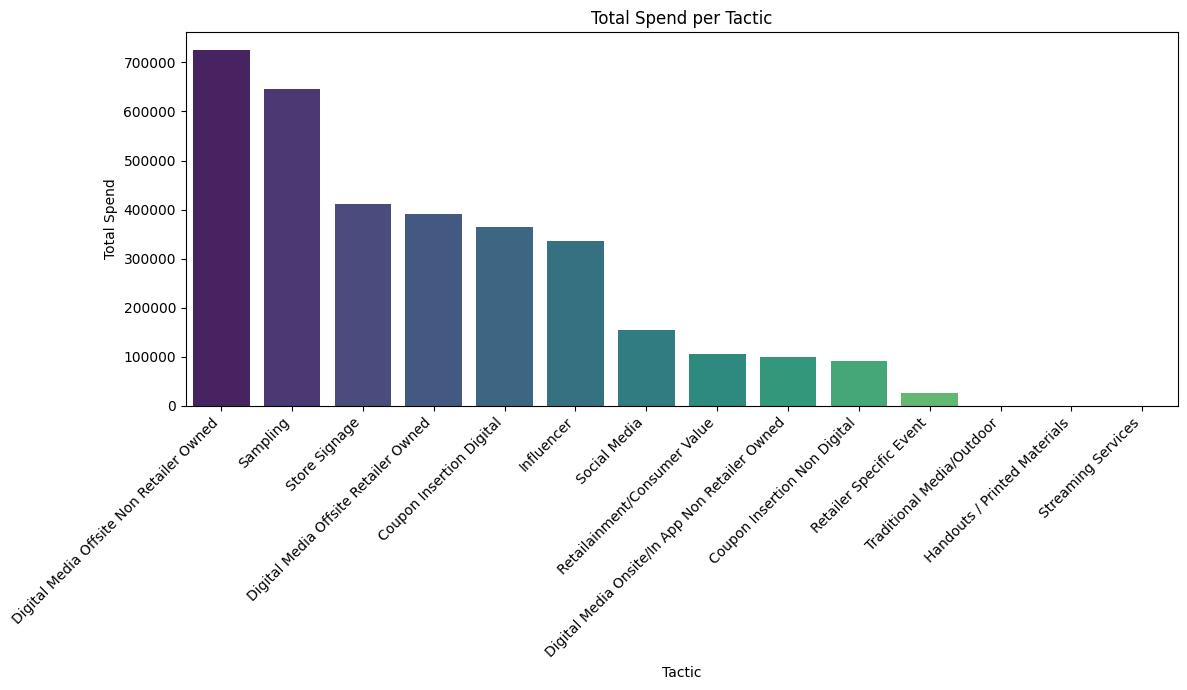

In [0]:
#Total Spend per Tactic
plt.figure(figsize=(12, 7))
sns.barplot(x=tactic_spend.index, y=tactic_spend.values, palette='viridis')
plt.title('Total Spend per Tactic')
plt.xlabel('Tactic')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [0]:
df.isnull().sum()

Date                 0
Start of Week        0
Week of Year         0
Fiscal_Year          0
Platform             0
Retailer             0
Program              0
Brand                0
Tactic_Group         0
Tactic               0
Tactic_Start_Date    0
Tactic_End_Date      0
Spend                0
dtype: int64

In [0]:
# Get top 5 tactics by total spend for time series analysis
top_5_tactics = df.groupby('Tactic')['Spend'].sum().nlargest(5).index
top_5_tactics

Index(['Digital Media Offsite Non Retailer Owned', 'Sampling', 'Store Signage',
       'Digital Media Offsite Retailer Owned', 'Coupon Insertion Digital'],
      dtype='object', name='Tactic')

/root/.ipykernel/24004/command-6282615953769903-218305940:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_tactics_spend.index, y=top_5_tactics_spend.values, palette='viridis')


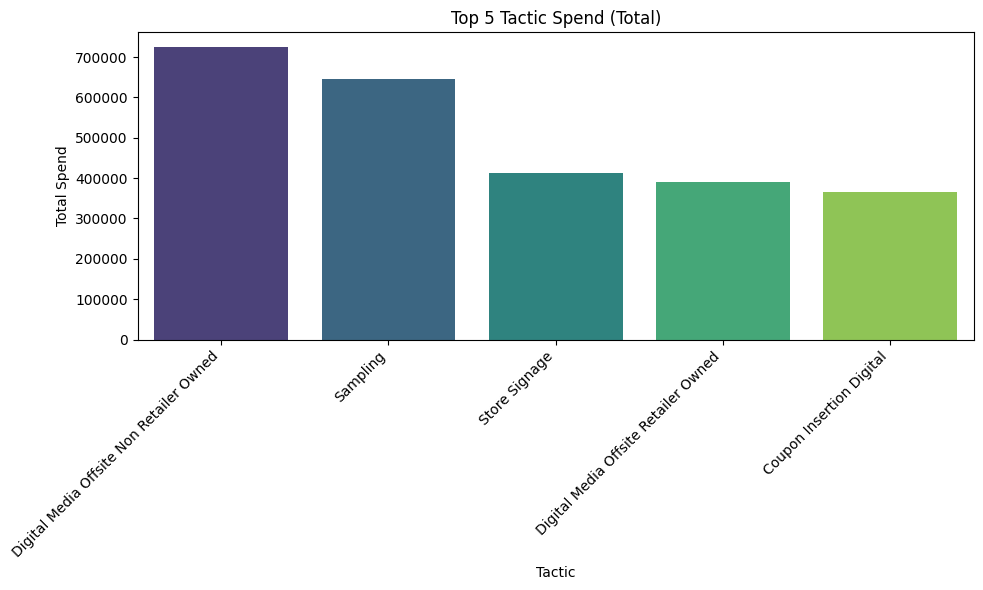

In [0]:
# Filter data for top 5 tactics and group by Date and Tactic
tactic_spend_over_time = df[df['Tactic'].isin(top_5_tactics)].groupby(['Date', 'Tactic'])['Spend'].sum().unstack()
top_5_tactics_spend = tactic_spend.head(5)
#pkot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_tactics_spend.index, y=top_5_tactics_spend.values, palette='viridis')
plt.title('Top 5 Tactic Spend (Total)')
plt.xlabel('Tactic')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [0]:
#Marketing Tactic Trends:

#Dominant & Consistent: Digital Media Offsite Non Retailer Owned & Sampling held the highest spend throughout, indicating continuous strategic value despite fluctuations.

#Significant & Aligned: Store Signage & Digital Media Offsite Retailer Owned consistently contributed a large portion, with spend peaks tied to specific campaigns.

#Erratic & Promotional: Coupon Insertion Digital showed inconsistent, high-then-low spending, suggesting use for short-term promotions.

#Overall: Spend allocation is dynamic and strategic, driven by campaign cycles rather than continuous growth/decline, with digital and sampling methods maintaining established importance.

In [0]:
#Platform analysis

In [0]:
# Total spend per platform (aggregate 3)
platform_spend = df.groupby('Platform')['Spend'].sum().sort_values(ascending=False)
platform_spend

Platform
Snapple Custom                                       661482.37
Flavors Zero 2.0                                     536255.72
Keurig K-ICED Essentials (Kroger only)               334999.28
Coffee & Brewer System Sell                          267499.44
CSD Flavors Portfolio Zero Sugar (Year 2)            199803.44
CSD Flavors Holiday                                  186703.92
Coffee Spring Seasonals                              149999.16
Custom Program                                       146322.21
Flavors Holiday                                      100000.44
Polar Support                                         59999.66
Sprite Summer Relaxation                              55000.36
GMCR Brew Over Ice                                    54999.33
Portfolio - Spring Seasonals (GMCR, TODS, MCCafe)     50000.48
Core Summer                                           50000.20
DP College Football Wave 1                            49999.90
Sunkist / Squirt Summer                       

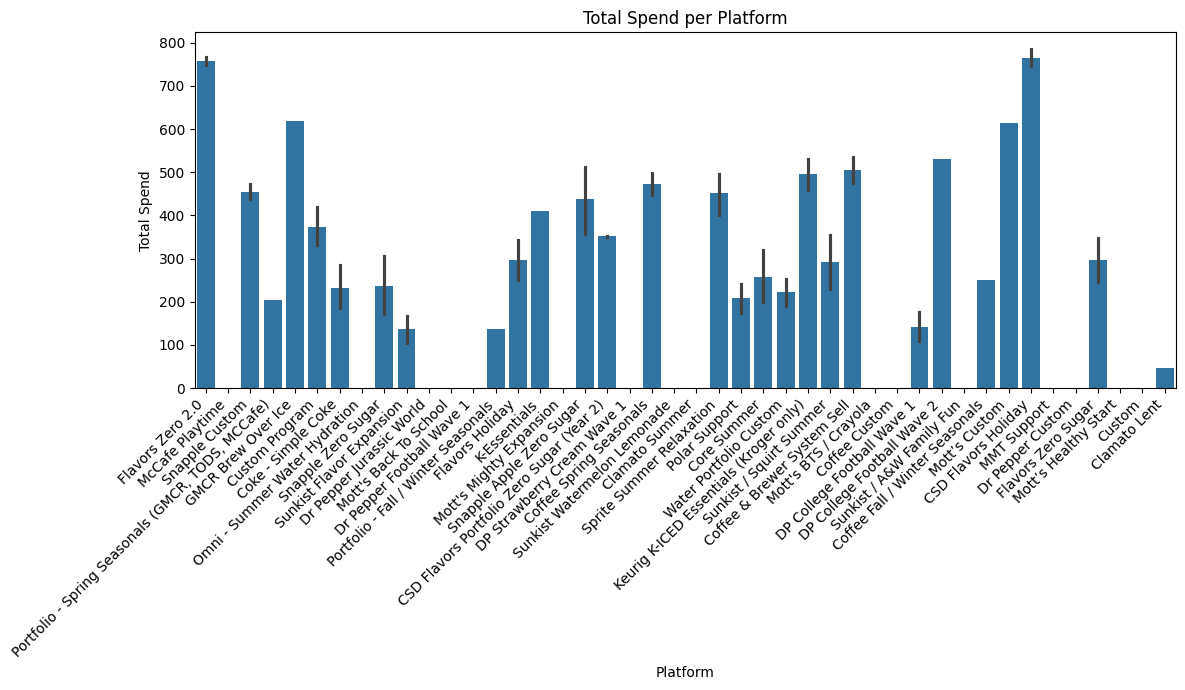

In [0]:
# # Total spend per platform
plt.figure(figsize=(12, 7))
sns.barplot(x='Platform', y='Spend', data=df)
plt.title('Total Spend per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [0]:
# Get top 5 platforms by total spend for time series analysis
top_5_platforms = df.groupby('Platform')['Spend'].sum().nlargest(5).index
top_5_platforms

Index(['Snapple Custom', 'Flavors Zero 2.0',
       'Keurig K-ICED Essentials (Kroger only)', 'Coffee & Brewer System Sell',
       'CSD Flavors Portfolio Zero Sugar (Year 2)'],
      dtype='object', name='Platform')

/root/.ipykernel/24004/command-6282615953769928-957656360:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_platforms_spend.index, y=top_5_platforms_spend.values, palette='viridis')


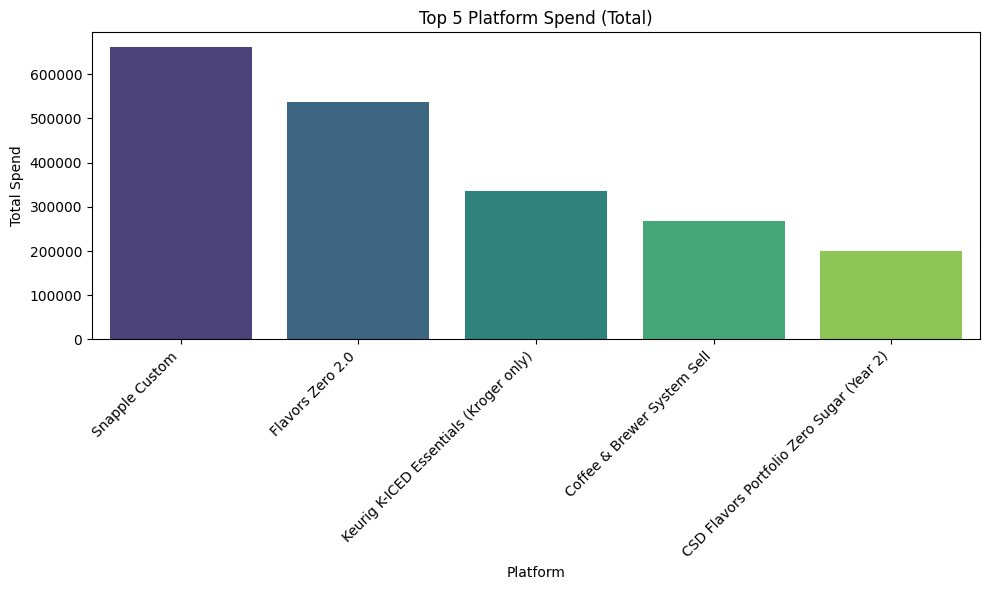

In [0]:
# Filter data for top 5 platforms and group by Date and Platform
platform_spend_over_time = df[df['Platform'].isin(top_5_platforms)].groupby(['Date', 'Platform'])['Spend'].sum().unstack()
platform_total_spend = df.groupby('Platform')['Spend'].sum()
top_5_platforms_spend = platform_total_spend.nlargest(5)
#plot
#Top 5 Platform Spend Over Time
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_platforms_spend.index, y=top_5_platforms_spend.values, palette='viridis')

plt.title('Top 5 Platform Spend (Total)') # Set the plot title
plt.xlabel('Platform') # Label for the x-axis
plt.ylabel('Total Spend') # Label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to ensure everything fits

plt.show()


In [0]:
#Shifts in Spend Across Platforms Over Time

#Snapple Custom & Flavors Zero 2.0: High, intermittent spikes, indicating targeted, campaign-driven investment.

#Keurig K-ICED, Coffee & Brewer System, CSD Flavors Portfolio Zero Sugar: More modest, consistent spend.

#Overall: Highly dynamic, campaign-specific spending with concentrated bursts, reflecting flexible budgeting for diverse objectives.

In [0]:
#trend analysis

Overall Spend Over Time (first 5 rows):
        Date    Spend
0 2022-01-01  9089.08
1 2022-01-02  9089.08
2 2022-01-03  9089.08
3 2022-01-04  9089.08
4 2022-01-05  9089.08


/root/.ipykernel/24004/command-6282615953769940-3849409673:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_overall_spend['Date'], y=monthly_overall_spend['Spend'], palette='viridis')


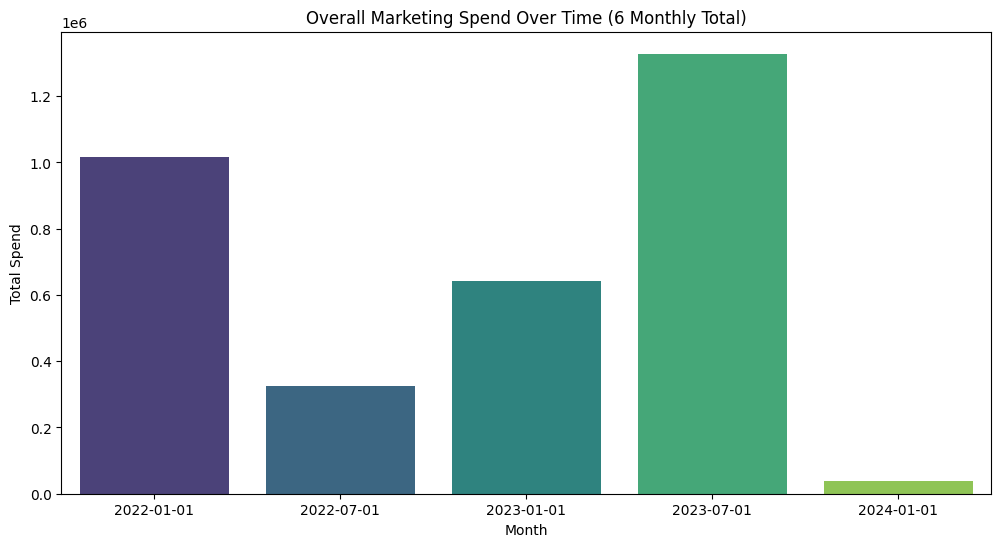

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-6282615953769940>, line 17
     15 # formating teh x axis
     16 ax = plt.gca()
---> 17 ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
     18 ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
     19 plt.xticks(rotation=45, ha='right')

NameError: name 'mdates' is not defined

In [0]:
# Calculate overall spend over time
overall_spend_over_time = df.groupby('Date')['Spend'].sum().reset_index()
print("Overall Spend Over Time (first 5 rows):")
print(overall_spend_over_time.head())
monthly_overall_spend = overall_spend_over_time.set_index('Date').resample('6MS')['Spend'].sum().reset_index()

#plot
plt.figure(figsize=(12, 6)) 
sns.barplot(x=monthly_overall_spend['Date'], y=monthly_overall_spend['Spend'], palette='viridis')

plt.title('Overall Marketing Spend Over Time (6 Monthly Total)')
plt.xlabel('Month')
plt.ylabel('Total Spend')

# formating teh x axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/root/.ipykernel/24004/command-6316587252702927-1578466994:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_spend.head(10).index, y=campaign_spend.head(10).values, palette='cividis')


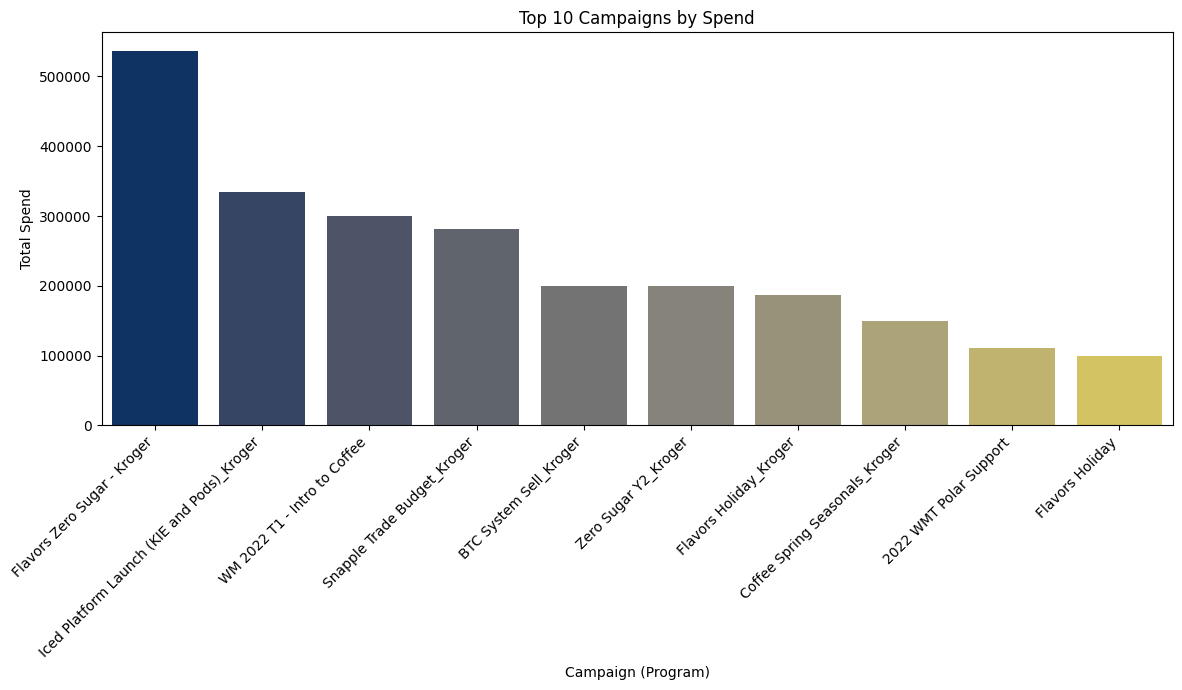

In [0]:
# Plot 4: Top 10 Campaigns by Spend
plt.figure(figsize=(12, 7))
sns.barplot(x=campaign_spend.head(10).index, y=campaign_spend.head(10).values, palette='cividis')
plt.title('Top 10 Campaigns by Spend')
plt.xlabel('Campaign (Program)')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


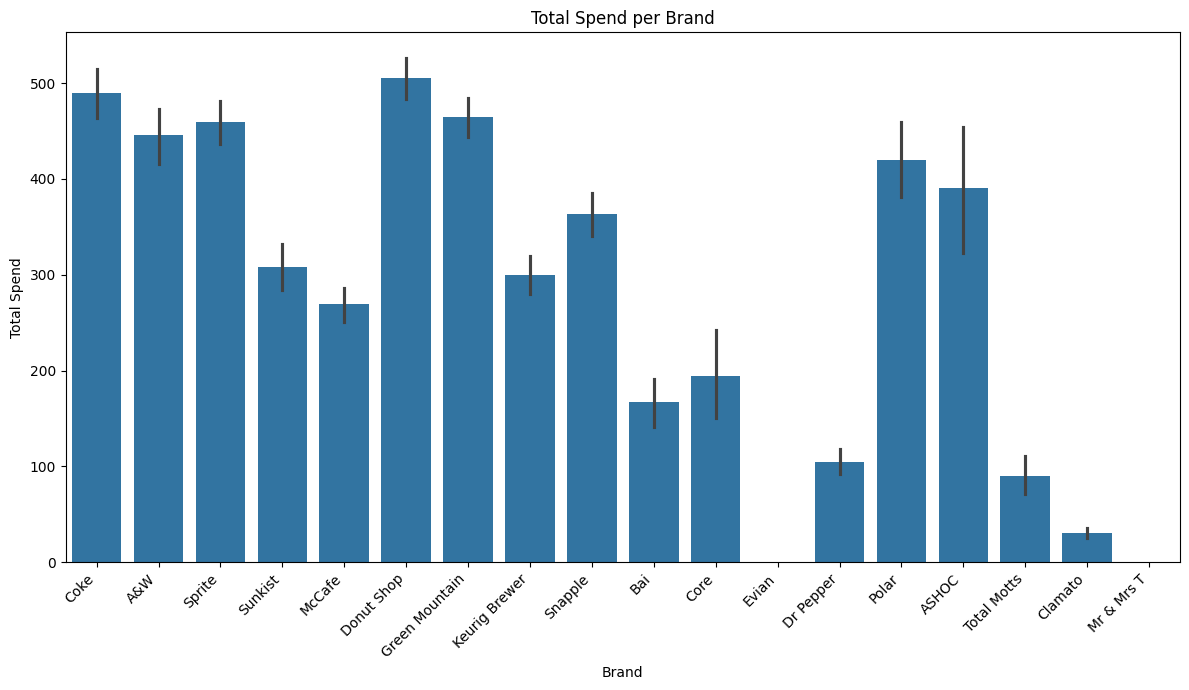

In [0]:
# Total spend per brand
plt.figure(figsize=(12, 7))
sns.barplot(x='Brand', y='Spend', data=df)
plt.title('Total Spend per Brand')
plt.xlabel('Brand')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

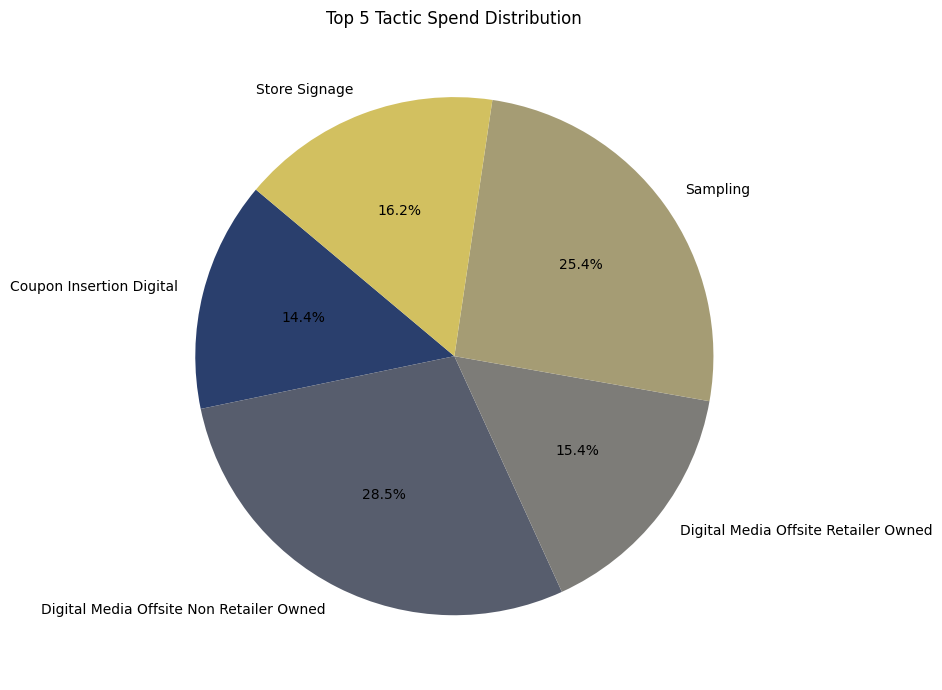

In [0]:
# Plot 5: Top 5 Tactic Spend Over Time
top_5_tactics = df.groupby('Tactic')['Spend'].sum().nlargest(5).index
tactic_spend_total = df[df['Tactic'].isin(top_5_tactics)].groupby('Tactic')['Spend'].sum()
plt.figure(figsize=(10, 7))
tactic_spend_total.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('cividis', len(top_5_tactics)))
plt.title('Top 5 Tactic Spend Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [0]:
# Plot 6: Top Platform Spend Over Time
display(overall_spend_overtime)

Date Spend 2022-01-01T00:00:00Z 9089.08 2022-01-02T00:00:00Z 9089.08 2022-01-03T00:00:00Z 9089.08 2022-01-04T00:00:00Z 9089.08 2022-01-05T00:00:00Z 9089.08 2022-01-06T00:00:00Z 9089.08 2022-01-07T00:00:00Z 9089.08 2022-01-08T00:00:00Z 9089.08 2022-01-09T00:00:00Z 9089.08 2022-01-10T00:00:00Z 9089.08 2022-01-11T00:00:00Z 9089.08 2022-01-12T00:00:00Z 9089.08 2022-01-13T00:00:00Z 9089.08 2022-01-14T00:00:00Z 9089.08 2022-01-15T00:00:00Z 9089.08 2022-01-16T00:00:00Z 9089.08 2022-01-17T00:00:00Z 9089.08 2022-01-18T00:00:00Z 9089.08 2022-01-19T00:00:00Z 9089.08 2022-01-20T00:00:00Z 9089.08 2022-01-21T00:00:00Z 9089.08 2022-01-22T00:00:00Z 9089.08 2022-01-23T00:00:00Z 9089.08 2022-01-24T00:00:00Z 9089.08 2022-01-25T00:00:00Z 9089.08 2022-01-26T00:00:00Z 9089.08 2022-01-27T00:00:00Z 9089.08 2022-01-28T00:00:00Z 9089.08 2022-01-29T00:00:00Z 9089.08 2022-01-30T00:00:00Z 9089.08 2022-01-31T00:00:00Z 9089.08 2022-02-01T00:00:00Z 15112.08 2022-02-02T00:00:00Z 15112.08 2022-02-03T00:00:00Z 15112.08 2022-02-04T00:00:00Z 15112.08 2022-02-05T00:00:00Z 15112.08 2022-02-06T00:00:00Z 15112.08 2022-02-07T00:00:00Z 15112.08 2022-02-08T00:00:00Z 15112.08 2022-02-09T00:00:00Z 15112.08 2022-02-10T00:00:00Z 15112.08 2022-02-11T00:00:00Z 15112.08 2022-02-12T00:00:00Z 15112.08 2022-02-13T00:00:00Z 15112.08 2022-02-14T00:00:00Z 15112.08 2022-02-15T00:00:00Z 15112.08 2022-02-16T00:00:00Z 15112.08 2022-02-17T00:00:00Z 15112.08 2022-02-18T00:00:00Z 15112.08 2022-02-19T00:00:00Z 15112.08 2022-02-20T00:00:00Z 15112.08 2022-02-21T00:00:00Z 15112.08 2022-02-22T00:00:00Z 15112.08 2022-02-23T00:00:00Z 15112.08 2022-02-24T00:00:00Z 15112.08 2022-02-25T00:00:00Z 15112.08 2022-02-26T00:00:00Z 15112.08 2022-02-27T00:00:00Z 15112.08 2022-02-28T00:00:00Z 15112.08 2022-03-01T00:00:00Z 4237.280000000001 2022-03-02T00:00:00Z 4237.280000000001 2022-03-03T00:00:00Z 4237.280000000001 2022-03-04T00:00:00Z 4237.280000000001 2022-03-05T00:00:00Z 4237.280000000001 2022-03-06T00:00:00Z 4237.280000000001 2022-03-07T00:00:00Z 4237.280000000001 2022-03-08T00:00:00Z 4237.280000000001 2022-03-09T00:00:00Z 4237.280000000001 2022-03-10T00:00:00Z 4237.280000000001 2022-03-11T00:00:00Z 4237.280000000001 2022-03-12T00:00:00Z 4237.280000000001 2022-03-13T00:00:00Z 4237.280000000001 2022-03-14T00:00:00Z 4237.280000000001 2022-03-15T00:00:00Z 4237.280000000001 2022-03-16T00:00:00Z 4237.280000000001 2022-03-17T00:00:00Z 4237.280000000001 2022-03-18T00:00:00Z 4237.280000000001 2022-03-19T00:00:00Z 4237.280000000001 2022-03-20T00:00:00Z 4237.280000000001 2022-03-21T00:00:00Z 4237.280000000001 2022-03-22T00:00:00Z 4237.280000000001 2022-03-23T00:00:00Z 4237.280000000001 2022-03-24T00:00:00Z 4237.280000000001 2022-03-25T00:00:00Z 4237.280000000001 2022-03-26T00:00:00Z 4237.280000000001 2022-03-27T00:00:00Z 4237.280000000001 2022-03-28T00:00:00Z 4237.280000000001 2022-03-29T00:00:00Z 4237.280000000001 2022-03-30T00:00:00Z 4237.280000000001 2022-03-31T00:00:00Z 4237.280000000001 2022-04-01T00:00:00Z 819.68 2022-04-02T00:00:00Z 819.68 2022-04-03T00:00:00Z 819.68 2022-04-04T00:00:00Z 819.68 2022-04-05T00:00:00Z 819.68 2022-04-06T00:00:00Z 819.68 2022-04-07T00:00:00Z 819.68 2022-04-08T00:00:00Z 819.68 2022-04-09T00:00:00Z 819.68 2022-04-10T00:00:00Z 819.68 2022-04-11T00:00:00Z 819.68 2022-04-12T00:00:00Z 819.68 2022-04-13T00:00:00Z 819.68 2022-04-14T00:00:00Z 819.68 2022-04-15T00:00:00Z 819.68 2022-04-16T00:00:00Z 819.68 2022-04-17T00:00:00Z 819.68 2022-04-18T00:00:00Z 1437.65 2022-04-19T00:00:00Z 1437.65 2022-04-20T00:00:00Z 1437.65 2022-04-21T00:00:00Z 1437.65 2022-04-22T00:00:00Z 1437.65 2022-04-23T00:00:00Z 1437.65 2022-04-24T00:00:00Z 1437.65 2022-04-25T00:00:00Z 1437.65 2022-04-26T00:00:00Z 1437.65 2022-04-27T00:00:00Z 1437.65 2022-04-28T00:00:00Z 1437.65 2022-04-29T00:00:00Z 1437.65 2022-04-30T00:00:00Z 1437.65 2022-05-01T00:00:00Z 1981.88 2022-05-02T00:00:00Z 1981.88 2022-05-03T00:00:00Z 1981.88 2022-05-04T00:00:00Z 1981.88 2022-05-05T00:00:00Z 1981.88 2022-05-06T00:00:00Z 1981.88 2022-05-07T00:

Databricks visualization. Run in Databricks to view.

In [0]:
# Plot 6: Top 5 Platform Spend Over Time
top_5_platforms = df.groupby('Platform')['Spend'].sum().nlargest(5).index
platform_spend_over_time = df[df['Platform'].isin(top_5_platforms)].groupby(['Date', 'Platform'])['Spend'].sum().unstack()
display(top_5_platforms)
display(platform_spend_over_time)

Index(['Snapple Custom', 'Flavors Zero 2.0',
       'Keurig K-ICED Essentials (Kroger only)', 'Coffee & Brewer System Sell',
       'CSD Flavors Portfolio Zero Sugar (Year 2)'],
      dtype='object', name='Platform')

CSD Flavors Portfolio Zero Sugar (Year 2) Coffee & Brewer System Sell Flavors Zero 2.0 Keurig K-ICED Essentials (Kroger only) Snapple Custom null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null 9089.08 null 6023.0 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2798.16 null null null 0.0 2

In [0]:
# Plot 7: Top 5 Campaign Spend Over Time
top_5_campaigns = df.groupby('Program')['Spend'].sum().nlargest(5).index
campaign_spend_over_time = df[df['Program'].isin(top_5_campaigns)].groupby(['Date', 'Program'])['Spend'].sum().unstack()
display(top_5_campaigns)
display(campaign_spend_over_time)

Index(['Flavors Zero Sugar - Kroger',
       'Iced Platform Launch (KIE and Pods)_Kroger',
       'WM 2022 T1 - Intro to Coffee', 'Snapple Trade Budget_Kroger',
       'BTC System Sell_Kroger'],
      dtype='object', name='Program')

BTC System Sell_Kroger Flavors Zero Sugar - Kroger Iced Platform Launch (KIE and Pods)_Kroger Snapple Trade Budget_Kroger WM 2022 T1 - Intro to Coffee null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null null null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null 9089.08 null null 6023.0 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null null 4237.280000000001 null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null null null null 0.0 null nul

In [0]:
display(top_5_campaigns)

Index(['Flavors Zero Sugar - Kroger',
       'Iced Platform Launch (KIE and Pods)_Kroger',
       'WM 2022 T1 - Intro to Coffee', 'Snapple Trade Budget_Kroger',
       'BTC System Sell_Kroger'],
      dtype='object', name='Program')

In [0]:
#Key Insights:

#Spend is Campaign-Driven: Marketing spend spikes and drops sharply, tied to specific campaigns, not steady growth.
#Digital & Sampling Dominate: These tactics get the most budget, indicating their strategic importance.
#Key Platform Focus: Spending concentrates on a few major platforms (e.g., Snapple Custom), reflecting brand prioritization.
#Untapped Areas: Many platforms and some tactics receive no spend, possibly missed opportunities.

#Actionable Recommendations:
#Analyze ROI: Check if high-spend digital/sampling tactics are truly efficient.
#Explore Low-Spend Areas: Pilot small campaigns in currently neglected platforms/tactics if strategic.
#Optimize Campaign Synergy: Find ways to make campaign spending more efficient across different areas.
#Refine Seasonal Spending: Sharpen budget allocation for known peak seasons and promotions.
#Reallocate Based on Performance: Shift funds from underperforming areas to high-impact ones.